# Logistic Regression

Certain regression algorithms can serve for classification purposes. Logistic regression is a widely employed technique for determining the likelihood that an instance belongs to a specific class. For instance, it can estimate the probability of an email being spam, or of a flower of being of a cetrain species. If the estimated probability exceeds a predefined threshold, typically 50%, the model predicts that the instance belongs to the positive class labeled as "1"; otherwise, it predicts it belongs to the negative class labeled as "0". In that case, logistic regression functions as a binary classifier.

Similarly to a linear regression model, _logistic regression calculates a weighted sum of the input features (along with a bias term)_. However, instead of directly outputting the result like a linear regression model, logistic regression produces the _logistic_ of this outcome.Let's see that for a single feature:

For a single feature:

Linear Regression (predicting a value): $y = w_0 + w_1x_1$

Logistic Regression (predicting probability): $P(y=1) = \frac{1}{1 + e^{-(w_0 + w_1X_1)}}$

Note: the mathematical constant $e$ (also known as the Euler number) is approximately equal to $2.71828$. To learn about its significance in mathematics see [Wikipedia](https://en.wikipedia.org/wiki/E_(mathematical_constant)).

Similarly, for $n$ features:

Linear Regression: $Y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

Logistic Regression: $P(y=1) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)}}$

Logistic regression model prediction using a 50% threshold probability:

$y_{predicted} = \begin{cases}
        0, & P(y=1) < 0.5 \\
        1, & P(y=1) >= 0.5
      \end{cases}$

#### Naming Convetions

The function for the probability is called the **logistic function** ([Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)), hence the name for this classification method.

The exponent (i.e. power) of $e$ in the logistic function is called the **logit** ([Wikipedia](https://en.wikipedia.org/wiki/Logit)).

### Logistic Function

To get accustomed with the logistic function let's define it in code, and plot it for various $w_0$ and $w_1$. Here we are assuming a single feature for simplicity.

In [43]:
def logistic(x, w0, w1):
    """ generate a logistic function
    Args:
        x: input
        w0: intercept
        w1: slope

    Returns:
        logistic function
    """

    return 1 / (1 + np.exp(w0 -x*w1))

Let's plot the logistic function with $w_0=0$ and $w_1=1$. This logistic function has a special name - a sigmoid.

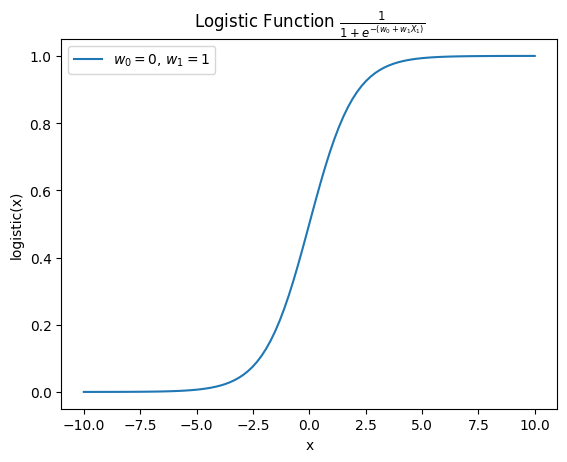

In [45]:
x = np.linspace(-10, 10, 100)
plt.plot(x, logistic(x, 0, 1), label=rf'$w_0={0}$, $w_1={1}$')
plt.xlabel('x')
plt.ylabel('logistic(x)')
plt.legend()
plt.title(r'Logistic Function $\frac{1}{1 + e^{-(w_0 + w_1X_1)}}$')
plt.show()

Next, let's plot the logistic function for various sets of $(w_0, w_1)$. First let's keep $w_0=0$ and vary $w_1$ over either positive or negative values. 

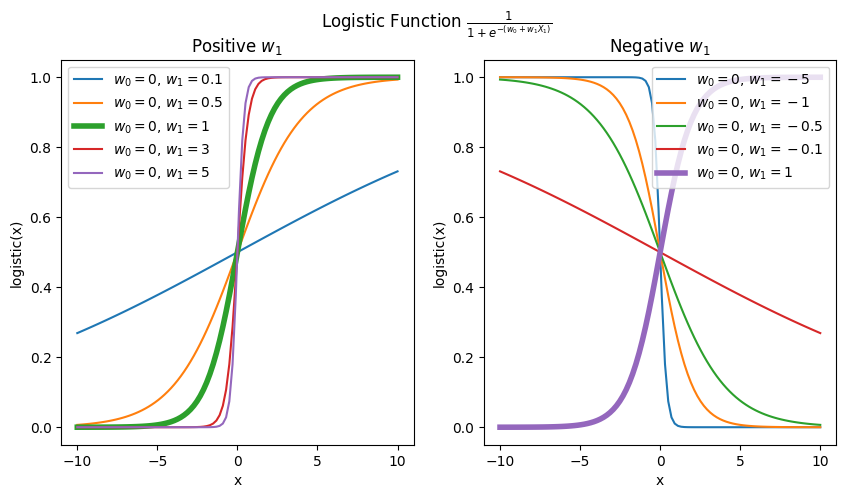

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'Logistic Function $\frac{1}{1 + e^{-(w_0 + w_1X_1)}}$')
x = np.linspace(-10, 10, 100)
ax1.plot(x, logistic(x, w0=0, w1=0.1), label=rf'$w_0=0$, $w_1=0.1$')
ax1.plot(x, logistic(x, w0=0, w1=0.5), label=rf'$w_0=0$, $w_1=0.5$')
ax1.plot(x, logistic(x, w0=0, w1=1), label=rf'$w_0=0$, $w_1=1$', linewidth=4)
ax1.plot(x, logistic(x, w0=0, w1=3), label=rf'$w_0=0$, $w_1=3$')
ax1.plot(x, logistic(x, w0=0, w1=5), label=rf'$w_0=0$, $w_1=5$')
ax1.set_xlabel('x')
ax1.set_ylabel('logistic(x)')
ax1.legend()
ax1.set_title(r'Positive $w_1$')

ax2.plot(x, logistic(x, w0=0, w1=-5), label=rf'$w_0=0$, $w_1=-5$')
ax2.plot(x, logistic(x, w0=0, w1=-1), label=rf'$w_0=0$, $w_1=-1$')
ax2.plot(x, logistic(x, w0=0, w1=-0.5), label=rf'$w_0=0$, $w_1=-0.5$')
ax2.plot(x, logistic(x, w0=0, w1=-0.1), label=rf'$w_0=0$, $w_1=-0.1$')
ax2.plot(x, logistic(x, w0=0, w1=1), label=rf'$w_0=0$, $w_1=1$', linewidth=4)
ax2.set_xlabel('x')
ax2.set_ylabel('logistic(x)')
ax2.legend()
ax2.set_title(r'Negative $w_1$')

plt.show()

We can notice the following:

* The magnitude of $w_1$ determines the steepness of the logistic function. A larger absolute value of $w_1$ corresponds to a steeper curve.
* The sign of $w_1$ determines the orientation of the logistic function. The sign of $w_1$ flips the function over a vertical axis.

Next, let's keep $w_1=1$, and vary $w_0$:

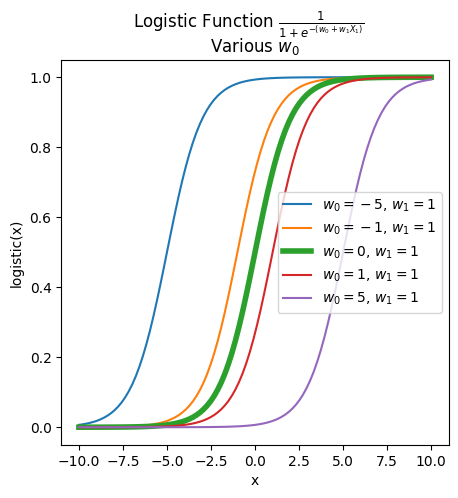

In [ ]:
# create a figure with two subplots
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle(r'Logistic Function $\frac{1}{1 + e^{-(w_0 + w_1X_1)}}$')
x = np.linspace(-10, 10, 100)
ax1.plot(x, logistic(x, w0=-5, w1=1), label=rf'$w_0=-5$, $w_1=1$')
ax1.plot(x, logistic(x, w0=-1, w1=1), label=rf'$w_0=-1$, $w_1=1$')
ax1.plot(x, logistic(x, w0=0, w1=1), label=rf'$w_0=0$, $w_1=1$', linewidth=4)
ax1.plot(x, logistic(x, w0=1, w1=1), label=rf'$w_0=1$, $w_1=1$')
ax1.plot(x, logistic(x, w0=5, w1=1), label=rf'$w_0=5$, $w_1=1$')
ax1.set_xlabel('x')
ax1.set_ylabel('logistic(x)')
ax1.legend()
ax1.set_title(r'Various $w_0$')

plt.show()

We can see that:
* $w_0$ shifts the function horizontally. $w_0$ determines the center of the function (around which it is symmetric. This is also where $logistic(x)=0.5$).

### Loss Function and Training

The loss function for logistic regression, in the case of a binary classification, and for a single data instance, is ([Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression)):

$loss(\bold{w}) = \begin{cases}
        -log(P(y=1)), & y=1 \\
        -log(1-P(y=1)), & y=0
      \end{cases}$

To see why this loss function makes sense intuitively, let's look at the logarithmic function it includes.

##### The Logarithm
The logarithm is the inverse function to exponentiation. That means that the logarithm of a number $x$ to the base $b$ is the exponent to which $b$ must be raised to produce $x$.

For example, since $1000 = 10^3$, the logarithm in base $10$ of $1000$ is $3$, or $\log_{10}(1000) = 3$. The logarithm of $x$ to base $b$ is denoted as $\log_b(x)$, or without the explicit base, $\log(x)$, when no confusion is possible, or when the base does not matter [Wikipedia](https://en.wikipedia.org/wiki/Logarithm)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

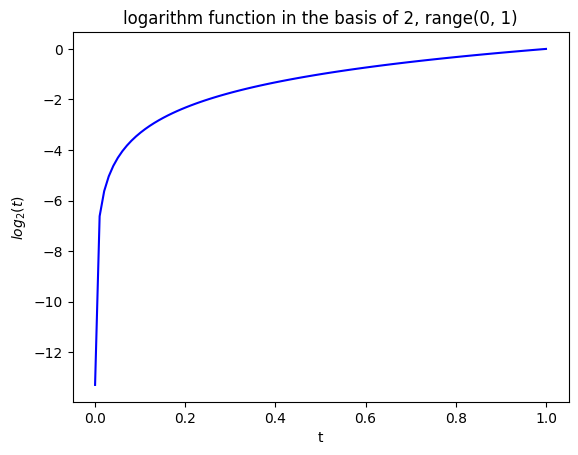

In [41]:
# plot logarithim function in the basis of 2
t = np.linspace(0.0001, 1, 100)
y = np.log2(t)
plt.plot(x, y, c='b')
plt.xlabel('t')
plt.ylabel(r'$log_2(t)$')
plt.title('logarithm function in the basis of 2, range(0, 1)')
plt.show()

So the loss function:

$loss(\bold{w}) = \begin{cases}
        -log(P(y=1)), & y=1 \\
        -log(1-P(y=1)), & y=0
      \end{cases}$

The extreme cases are:

| y | P(y=1) | loss value |
|---|--------|------------|
| $0$ | $0$ (correct) | $-\log(1) = 0$ |
| $0$ | $1$ (incorrect) | $\log(0) = +\infty$ |
| $1$ | $0$ (incorrect) |$\log(0) = +\infty$ |
| $1$ |$1$ (correct) |$-\log(1) = 0$ |

So that the value of the loss function is minimal ($0$) for a perfect correct prediction is infinitely large for a comepltely incorrect perdiction.

This loss function can be written as (convince yourelf by plugging in either $y=0$ or $y=1$):

$cost(\bold{w}) = -y\cdot \log(P) -(1-y)\cdot \log(1-P)$

For $m$ data instances:

$cost(\bold{w}) = \frac{1}{m} \Sigma_{i=1}^m \left[-y\cdot \log(P) -(1-y)\cdot \log(1-P)\right]$

Notes
1. The $\log$ can be in any base, as long as it is used consistently. The common base is $2$, but sometimes (e.g. in Tensorflow the base is $e$). One isn't better than the other. It's kind of like the difference between using km/hour and m/s ([stackexchange](https://stats.stackexchange.com/questions/295174/difference-in-log-base-for-cross-entropy-calcuation)). 
2. Minimizing this loss will result in the model with the maximum likelihood of being optimal, assuming that the instances follow a Gaussian distribution around the mean of their class. This is an implicit assumption when using the log loss.
3. This loss function is called the _log loss_, or _logistic loss_ or a specific case of _Cross Entropy_.

### Training Algorithm

* There is no 'closed form' solution for logistic regression, such as the normal equation for linear regression.
* An iterative methods, such as gradient descent are being used.

### Example: One-Feature Logistic Regression

First let's create an artificial dataset:

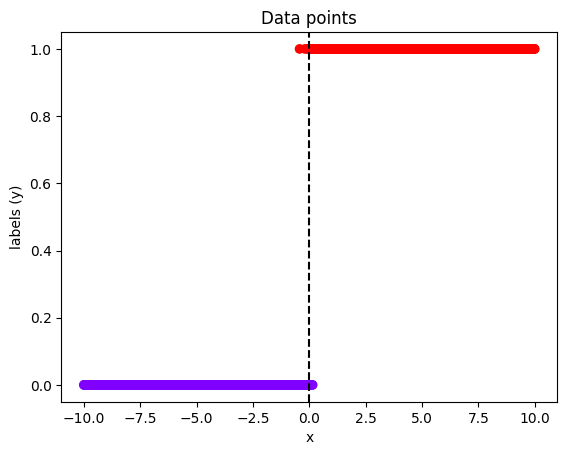

In [50]:
# generate 1000 data points
n = 1000

# the data points are uniformly distributed between -10 and 10
x = np.linspace(-10, 10, n)

# the data points are sorted in ascending order
x = np.sort(x)

# generate 1000 labels
# the labels are generated by a linear function with a little noise
# the noise is generated by a normal distribution with mean 0 and standard deviation 0.1
# the labels are then converted to be either 0 or 1
y = 0.5 * x + 0.5 + np.random.normal(0, 0.1, n)
y[y < 0.5] = 0
y[y >= 0.5] = 1

# plot the data points
plt.scatter(x, y, c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('labels (y)')
plt.axvline(x=0, c='k', linestyle='--')
plt.title('Data points')
plt.show()

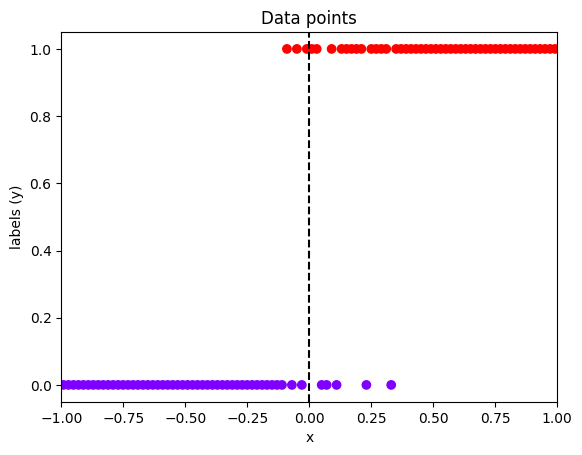

In [49]:
# zoom-in to x between -1 and 1
plt.scatter(x, y, c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('labels (y)')
plt.title('Data points')
plt.xlim(-1, 1)
plt.axvline(x=0, c='k', linestyle='--')
plt.show()

We can see that thanks to the noise, there is some overlap between the two classes. This can make the probabilistic interpretation of logistic regression more relevant.

Next, let's define a logistic regression model, and train it.
(note that here we don't create a train-test split for simplicity of the example. In real cases, a train-test split, or a cross-validation split, is the best practice to follow)

In [51]:
# run logistic regression
from sklearn.linear_model import LogisticRegression
# create a logistic regression model
model = LogisticRegression()
# train the model
model.fit(x.reshape(-1, 1), y)
# predict the labels for all data points
y_pred = model.predict(x.reshape(-1, 1))

Let's study a bit the output of the logistic model:

We start with `y_pred`, which is the output of `model.predict`. We can see that it is the class prediction, following an application of the threshold to the probability:

In [54]:
print(y_pred.shape)
print(y_pred[:10])
print(y[-10:])
print(y_pred[490:510])

# filter y_pred to get all the data points that aren't 0 nor 1
y_pred_filtered = y_pred[(y_pred != 0) & (y_pred != 1)]
print(y_pred_filtered.shape)

(1000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(0,)


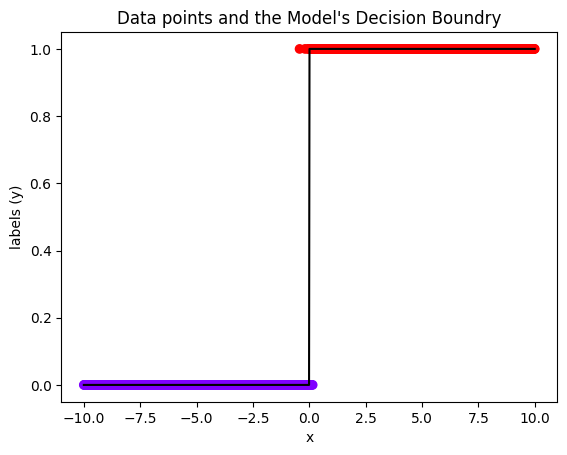

In [55]:
# plot the decision boundry
plt.scatter(x, y, c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('labels (y)')
plt.title("Data points and the Model's Decision Boundry")
plt.plot(x, y_pred, c='black')
plt.show()


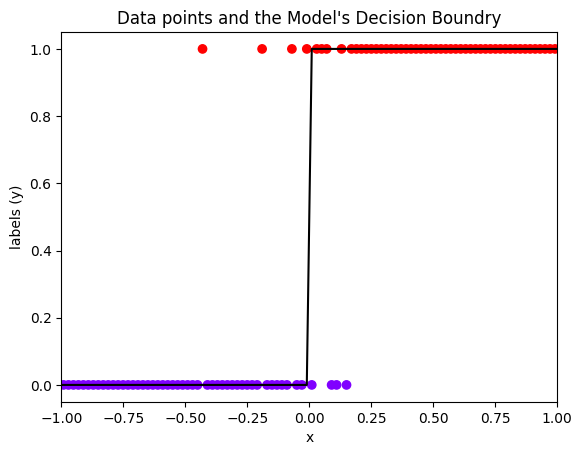

In [56]:
# plot the decision boundry, zoom-in to x between -1 and 1
plt.scatter(x, y, c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('labels (y)')
plt.title("Data points and the Model's Decision Boundry")
plt.plot(x, y_pred, c='black')
plt.xlim(-1, 1)
plt.show()

Next, let's look at the probabilities of this model:

In [57]:
y_pred_prob = model.predict_proba(x.reshape(-1, 1))

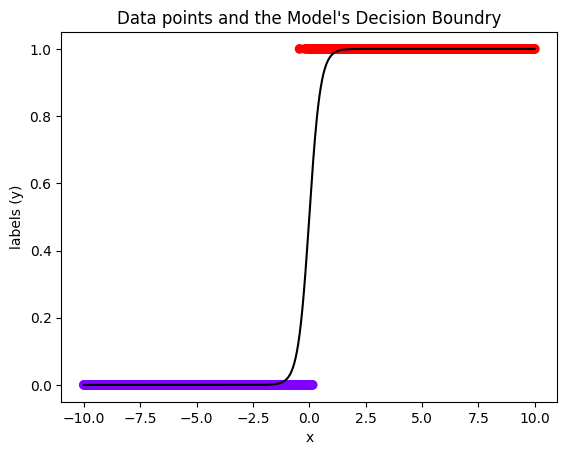

In [58]:
# plot the decision boundry:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('labels (y)')
plt.title("Data points and the Model's Decision Boundry")
plt.plot(x, y_pred_prob[:, 1], c='black')
plt.show()


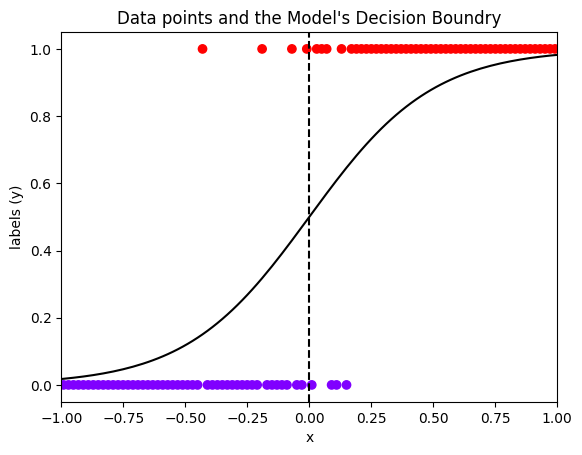

In [60]:
# plot the decision boundry, zoom-in to x between -1 and 1:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('labels (y)')
plt.title("Data points and the Model's Decision Boundry")
plt.plot(x, y_pred_prob[:, 1], c='black')
plt.axvline(x=0, c='k', linestyle='--')
plt.xlim(-1, 1)
plt.show()

Which $x$ is associated with $P(y=1)=0.6$? and which $x$ is associated with $P(y=1)=0.4$?

### Example: Two-Features Logistic Regression

In [61]:
# Generate data:
# 1000 samples from each class

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

negative_targets = np.zeros(num_samples_per_class)
positive_targets = np.ones(num_samples_per_class)

In [62]:
X = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [63]:
y = np.concatenate((negative_targets, positive_targets)).astype(np.float32)

In [64]:
def plot_data(X, num_samples_per_class, ax):
    ax.scatter(X[:num_samples_per_class,0], X[:num_samples_per_class,1], c='r')
    ax.scatter(X[num_samples_per_class:,0], X[num_samples_per_class:,1], c='g')
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    ax.legend(["Negative class", "Positive class"])
    ax.set_title("Data")
    return ax

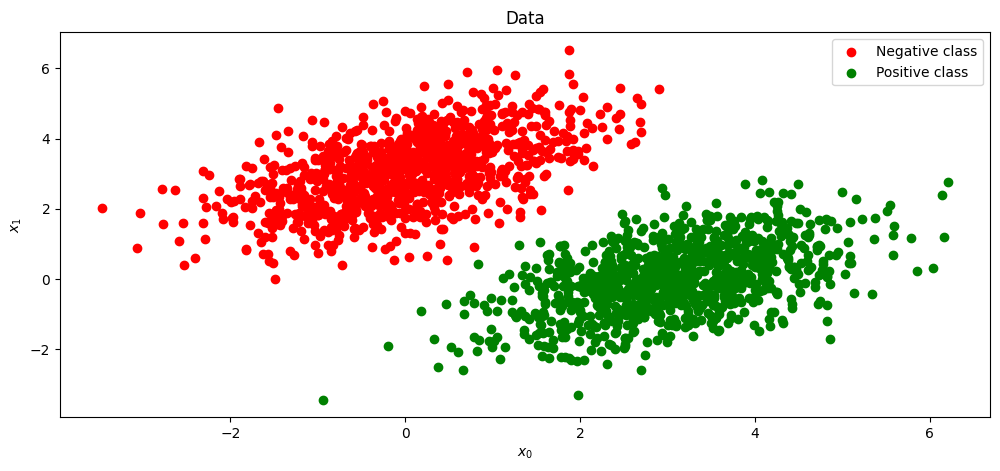

In [65]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()
ax = plot_data(X, num_samples_per_class, ax)


In [66]:
# run logistic regresion using sklearn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

print(f"Model weights: {model.coef_}, model bias: {model.intercept_}")

Model weights: [[ 3.28018986 -2.9667326 ]], model bias: [-0.55357683]


Text(0.5, 1.0, 'Decision boundary')

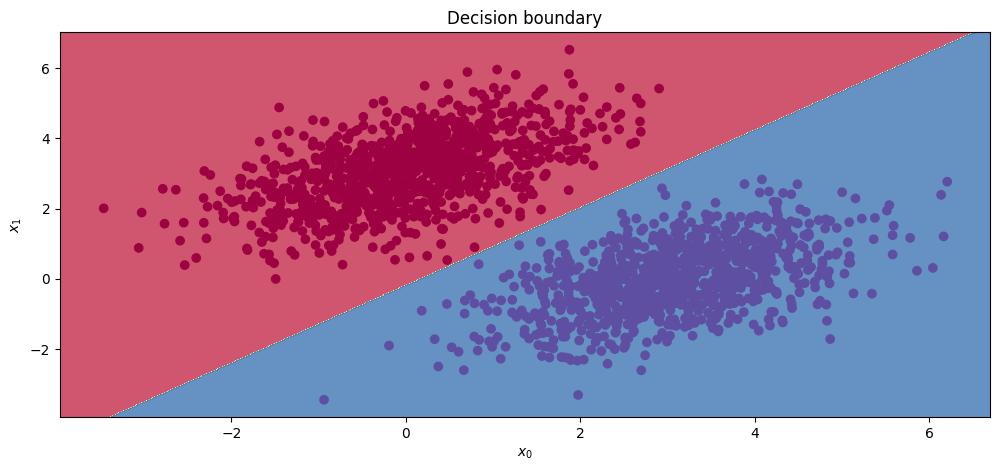

In [67]:
# plot the decision boundary

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()

# Set min and max values and give it some padding
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Generate a grid of points with distance h between them
h = 0.02
x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
mesh_output = model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
mesh_output = mesh_output.reshape(x_mesh.shape)

# Plot the contour and training examples
ax.contourf(x_mesh, y_mesh, mesh_output, cmap=plt.cm.Spectral, alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_title("Decision boundary")


### Comparison between logistic and linear regression

|              | Linear Regression                                | Logistic Regression                                                     |
|--------------|-------------------------------------------------|-------------------------------------------------------------------------|
| Model Equation   | $Y = w_0 + w_1X_1 + w_2X_2 + ... + w_nX_n$                      | $P(Y=1) = \frac{1}{1 + e^{-(w_0 + w_1X_1 + w_2X_2 + ... + w_nX_n)}}$ |
| Output Range  | Continuous values                               | Probabilities (0 to 1)                                                  |
| Loss Function | Mean Squared Error (MSE)<br> $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ | Binary Cross-Entropy Loss (Log Loss)<br> $Log Loss = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$                                  |
| Assumptions   | Linear relationship between independent variables and target | Log-odds are linearly related to independent variables                   |
| Interpretation | Coefficients represent change in the target for a unit change | Coefficients represent change in the log-odds of the target              |
| Application    | Regression tasks predicting continuous values    | Binary classification tasks                                             |
| Optimization Objective | Minimize the sum of squared differences between predictions | Minimize the log loss between predicted and actual labels                 |

$y$ represents the true target values, $\hat{y}$ represents the predicted target values, and $n$ represents the number of data points.               |

### Example: The Iris Dataset
The Iris Dataset section of this notebook is adjusted from [Geron's Notebook Chapter 4](https://github.com/ageron/handson-ml3/blob/79ce4412122ca2c57ed42a899bba2b2d99b47550/04_training_linear_models.ipynb). It is presented here in accordance with the [Apache v2 license ](https://github.com/ageron/handson-ml3/blob/79ce4412122ca2c57ed42a899bba2b2d99b47550/LICENSE)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [7]:
list(iris)  # show the keys of the Bunch dictionary

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [8]:
iris.keys()  # this is the same as list(iris)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
# print types of all the keys
for key in iris.keys():
    print(key, type(iris[key]))
    

data <class 'pandas.core.frame.DataFrame'>
target <class 'pandas.core.series.Series'>
frame <class 'pandas.core.frame.DataFrame'>
target_names <class 'numpy.ndarray'>
DESCR <class 'str'>
feature_names <class 'list'>
filename <class 'str'>
data_module <class 'str'>


In [6]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int32

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print(iris.DESCR)  # description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

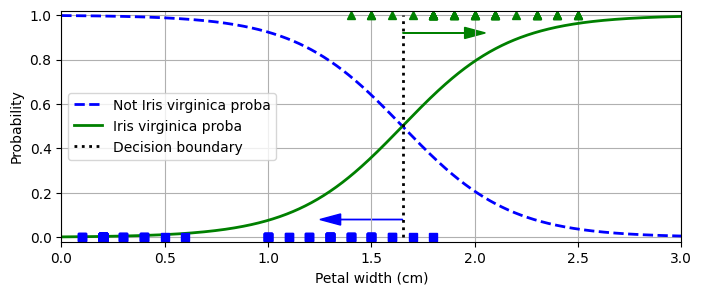

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [26]:
decision_boundary

1.6516516516516517

In [27]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

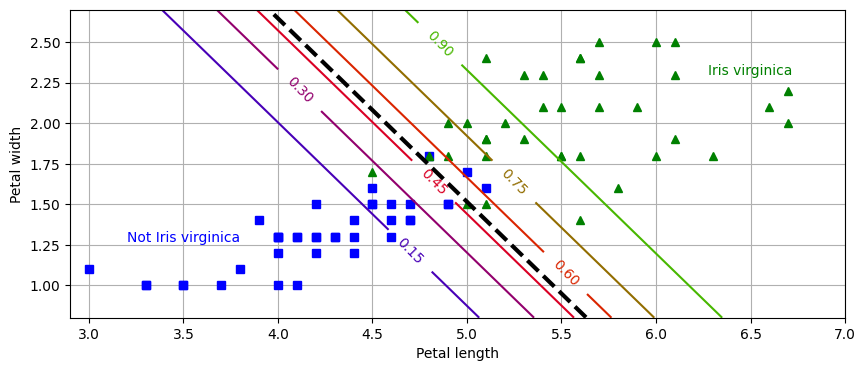

In [28]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()